# **Part I: Linear Regression with One Feature**

## **Objective**

Model stellar luminosity as a function of stellar mass using linear regression with an explicit bias term:
$$
\hat{L} = w * M  + b
$$

# Required Tasks

1. **Dataset visualization:** plot M vs L. Comment on linearity and plausibility.
2. **Model and loss:** implement prediction and mean squared error (MSE).
3. **Cost surface (mandatory):** evaluate J(w,b) on a grid of w and b. Plot a 3D surface or contour plot. Explain what the minimum represents.
4. **Gradients:** derive and implement dJ/dw and dJ/db.
5. **Gradient descent (non-vectorized):** compute gradients using an explicit loop over samples.
6. **Gradient descent (vectorized):** compute gradients using NumPy vectorization (no loop over samples).
7. **Convergence (mandatory):** plot loss vs iterations, and comment on convergence speed and stability.
8. **Experiments (mandatory):** run at least three learning rates; report final w, b, and loss.
9. **Final fit plot:** plot the regression line over the data and discuss systematic errors.
10. **Conceptual questions:** 
* astrophysical meaning of w; 
* Why is a linear model limited here?


## 1. Dataset and Visualitation
 **Dataset (one feature):**\
**M:** stellar mass (in units of solar mass, M⊙)\
**L:** stellar luminosity (in units of solar luminosity, L⊙)
* **M** = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]\ 
* **L** = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

Plot M vs L. Comment on linearity and plausibility.


Number of examples m = 10
Stellar Mass M :[0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4]
Stellar Luminosity L : [ 0.15  0.35  1.    2.3   4.1   7.   11.2  17.5  25.   35.  ]


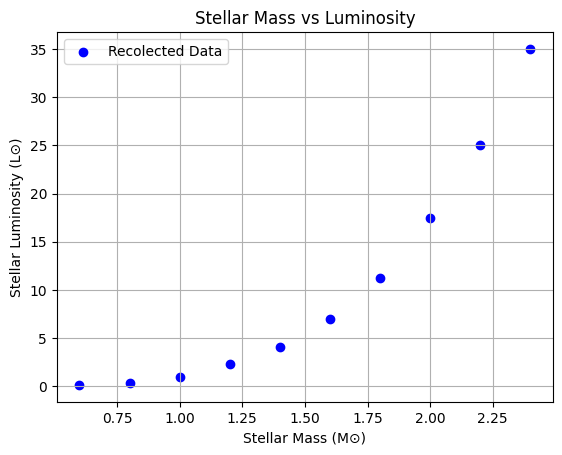

In [7]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]) 
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]) 

m = len(M)
print(f"Number of examples m = {m}")
print(f"Stellar Mass M :{M}")
print(f"Stellar Luminosity L : {L}")


plt.figure()
plt.scatter(M, L, color='blue', label='Recolected Data')
plt.xlabel('Stellar Mass (M⊙)')
plt.ylabel('Stellar Luminosity (L⊙)')
plt.title('Stellar Mass vs Luminosity')
plt.grid(True)
plt.legend()
plt.show()

## Observations

* **Linearity**\
The relationship is clearly **non-linear**. An accelerated growth trend (power or exponential type) is observed. A simple linear regression model will exhibit high bias, as it cannot capture the curvature of the data.

* **Plausibility**\
The dataset is **plausible**. It accurately reflects the actual physical relationship of main-sequence stars, where luminosity is extremely sensitive to changes in stellar mass.

## 2. Model and loss

Implement prediction and mean squared error (MSE).

* **Prediction function:** $$
                    \hat{L} = w * M  + b
                   $$ 
* **Mean Squared Error (MSE) function:**  $$J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{L}_i - L_i)^2$$



In [8]:
def predict(M, w, b):
    L_hat = w * M + b
    return L_hat

def compute_cost(M, L, w, b):
    m = len(M)
    L_hat = predict(M, w, b)
    errors = L_hat - L
    cost = (1 / (2 * m)) * np.sum(errors **2)
    return cost

# Test cost function

print(f"Cost with w=0, b=0: J = {compute_cost(M, L, 0, 0):.4f}")
print(f"Cost with w=0, b=-7: J = {compute_cost(M, L, 0, -7):.4f}")
print(f"Cost with w=10, b=-3: J = {compute_cost(M, L, 10, -3):.4f}")

Cost with w=0, b=0: J = 117.6968
Cost with w=0, b=-7: J = 214.7168
Cost with w=10, b=-3: J = 22.0468


## 3. Cost surface (mandatory)
Evaluate J(w,b) on a grid of w and b. Plot a 3D surface or contour plot. Explain what the minimum represents.

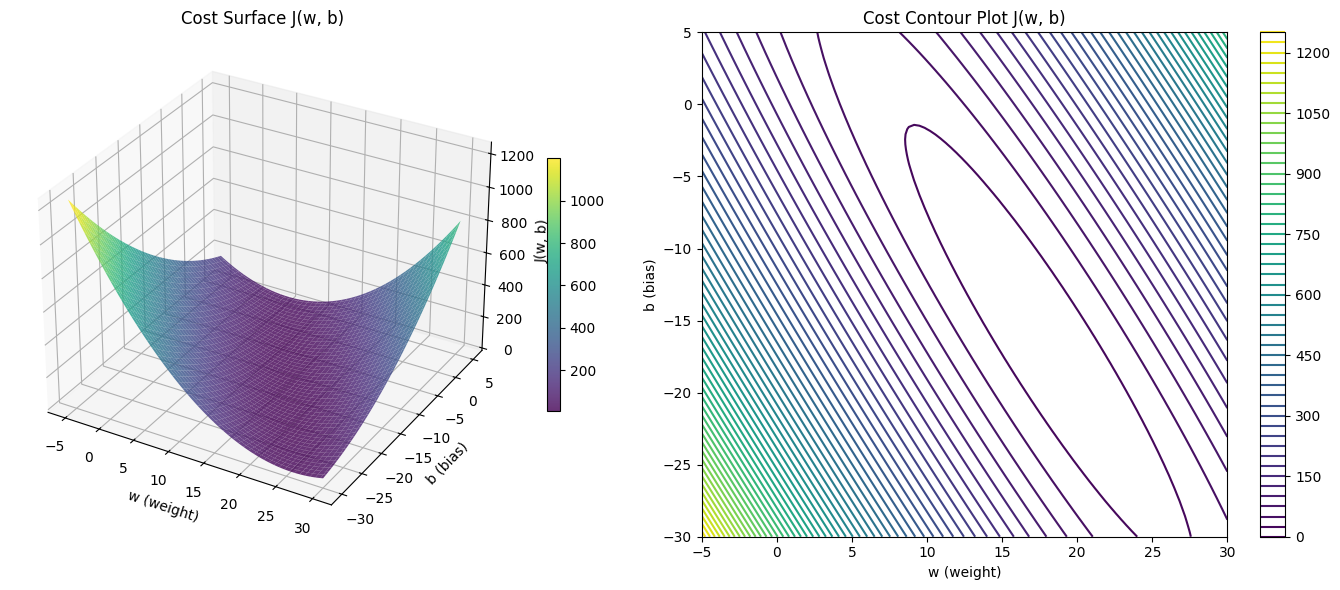

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

w_values = np.linspace(-5,30, 100)
b_values = np.linspace(-30, 5, 100)

W, B = np.meshgrid(w_values, b_values)

J_vals = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        J_vals[i, j] = compute_cost(M, L, W[i, j], B[i, j])

fig = plt.figure(figsize=(14, 6))


ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(W, B, J_vals, cmap=cm.viridis, alpha=0.8, linewidth=0)
ax1.set_xlabel('w (weight)')
ax1.set_ylabel('b (bias)')
ax1.set_zlabel('J(w, b)')
ax1.set_title('Cost Surface J(w, b)')
fig.colorbar(surf, ax=ax1, shrink=0.5)


ax2 = fig.add_subplot(122)
contour = ax2.contour(W, B, J_vals, levels=50, cmap=cm.viridis)
ax2.set_xlabel('w (weight)')
ax2.set_ylabel('b (bias)')
ax2.set_title('Cost Contour Plot J(w, b)')
fig.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()



## 4. Gradients

Derive and implement the partial derivatives:

$$
\frac{\partial J}{\partial w}
= \frac{2}{n} \sum_{i=1}^{n} (\hat{L}_i - L_i)\cdot M_i
$$

$$
\frac{\partial J}{\partial b}
= \frac{2}{n} \sum_{i=1}^{n} (\hat{L}_i - L_i)
$$


In [10]:
def compute_gradients(M, L, w, b):
    m = len(M)
    L_hat = predict(M, w, b)
    errors = L_hat - L
    dj_dw = (1 / m) * np.sum(errors * M)
    dj_db = (1 / m) * np.sum(errors)

    return dj_dw, dj_db

# Test the function 

w_test = 0.0
b_test = 0.0
dj_dw, dj_db = compute_gradients(M, L, w_test, b_test)
print(f"Gradients at w={w_test}, b={b_test}:")
print(f"  ∂J/∂w = {dj_dw:.4f}")
print(f"  ∂J/∂b = {dj_db:.4f}")

w_test2 = 5.0
b_test2 = 10.0
dj_dw2, dj_db2 = compute_gradients(M, L, w_test2, b_test2)
print("Gradients at w={w_test}, b={b_test}:")
print(f"  ∂J/∂w = {dj_dw:.4f}")
print(f"  ∂J/∂b = {dj_db:.4f}")




Gradients at w=0.0, b=0.0:
  ∂J/∂w = -21.5230
  ∂J/∂b = -10.3600
Gradients at w={w_test}, b={b_test}:
  ∂J/∂w = -21.5230
  ∂J/∂b = -10.3600


## 5. Gradient descent (non-vectorized)

Compute gradients using an explicit loop over samples.

In [21]:
def compute_gradients(M, L, w, b):
    m = len(M)
    sum_dw = 0.0
    sum_db = 0.0
    
    for i in range(m):
        L_wb = w * M[i] + b  
        error_i = L_wb - L[i]  
        
        sum_dw += error_i * M[i]  
        sum_db += error_i     
    
    dj_dw = sum_dw / m
    dj_db = sum_db / m
    
    return dj_dw, dj_db

def gradient_descent(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []


    
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(M, L, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = compute_cost(M, L, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i:4d}: w = {w:8.4f}, b = {b:8.4f}, Cost = {cost:10.4f}")
    
    return w, b, history_iterations, history_costs


print("Gradient Descent")
print("=" * 50)

w_init = 0.0
b_init = 0.0
alpha = 0.1
num_iterations = 1000

w_learned_nv, b_learned_nv, it_hist, cost_hist = gradient_descent(M, L, w_init, b_init, alpha, num_iterations)

print("\nLearned parameters:")
print(f"  w = {w_learned_nv:.6f}")
print(f"  b = {b_learned_nv:.6f}")
print(f"  Final Cost = {cost_hist[-1]:.6f}")

Gradient Descent
Iteration    0: w =   2.1523, b =   1.0360, Cost =    70.4969
Iteration  100: w =  13.4290, b =  -9.0460, Cost =    13.7140
Iteration  200: w =  16.3146, b = -13.8270, Cost =    10.3797
Iteration  300: w =  17.4290, b = -15.6735, Cost =     9.8823
Iteration  400: w =  17.8595, b = -16.3867, Cost =     9.8082
Iteration  500: w =  18.0257, b = -16.6621, Cost =     9.7971
Iteration  600: w =  18.0899, b = -16.7685, Cost =     9.7954
Iteration  700: w =  18.1147, b = -16.8096, Cost =     9.7952
Iteration  800: w =  18.1243, b = -16.8255, Cost =     9.7952
Iteration  900: w =  18.1280, b = -16.8316, Cost =     9.7951

Learned parameters:
  w = 18.129395
  b = -16.833951
  Final Cost = 9.795149


## 6. Gradient descent (vectorized)

Compute gradients using NumPy vectorization (no loop over samples).


In [22]:
def gradient_descent_vectorized(M, L, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    m = len(M)
    history = []
    
    for i in range(num_iterations):
        L_hat = w * M + b
        errors = L_hat - L
        dj_dw = (1 / m) * np.sum(errors * M)
        dj_db = (1 / m) * np.sum(errors)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = (1 / (2 * m)) * np.sum(errors ** 2)
        history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i:4d}: w = {w:8.4f}, b = {b:8.4f}, Cost = {cost:10.4f}")
    
    return w, b, history


print("Gradient Descent (Vectorized)")
print("=" * 50)

w_init_v = 0.0
b_init_v = 0.0
alpha_v = 0.1
num_iterations_v = 1000

w_learned_v, b_learned_v, history_v = gradient_descent_vectorized(M, L, w_init_v, b_init_v, alpha_v, num_iterations_v)

print("\nLearned parameters (vectorized):")
print(f"  w = {w_learned_v:.6f}")
print(f"  b = {b_learned_v:.6f}")
print(f"  Final Cost = {history_v[-1]:.6f}")



Gradient Descent (Vectorized)
Iteration    0: w =   2.1523, b =   1.0360, Cost =   117.6968
Iteration  100: w =  13.4290, b =  -9.0460, Cost =    13.7892
Iteration  200: w =  16.3146, b = -13.8270, Cost =    10.3909
Iteration  300: w =  17.4290, b = -15.6735, Cost =     9.8840
Iteration  400: w =  17.8595, b = -16.3867, Cost =     9.8084
Iteration  500: w =  18.0257, b = -16.6621, Cost =     9.7971
Iteration  600: w =  18.0899, b = -16.7685, Cost =     9.7954
Iteration  700: w =  18.1147, b = -16.8096, Cost =     9.7952
Iteration  800: w =  18.1243, b = -16.8255, Cost =     9.7952
Iteration  900: w =  18.1280, b = -16.8316, Cost =     9.7951

Learned parameters (vectorized):
  w = 18.129395
  b = -16.833951
  Final Cost = 9.795149


## 7. Convergence (mandatory)

Plot loss vs iterations, and comment on convergence speed and stability.

Convergence Analysis
Iteration    0: w =   2.1523, b =   1.0360, Cost =   117.6968
Iteration  100: w =  13.4290, b =  -9.0460, Cost =    13.7892
Iteration  200: w =  16.3146, b = -13.8270, Cost =    10.3909
Iteration  300: w =  17.4290, b = -15.6735, Cost =     9.8840
Iteration  400: w =  17.8595, b = -16.3867, Cost =     9.8084
Iteration  500: w =  18.0257, b = -16.6621, Cost =     9.7971
Iteration  600: w =  18.0899, b = -16.7685, Cost =     9.7954
Iteration  700: w =  18.1147, b = -16.8096, Cost =     9.7952
Iteration  800: w =  18.1243, b = -16.8255, Cost =     9.7952
Iteration  900: w =  18.1280, b = -16.8316, Cost =     9.7951
Iteration 1000: w =  18.1294, b = -16.8340, Cost =     9.7951
Iteration 1100: w =  18.1300, b = -16.8349, Cost =     9.7951
Iteration 1200: w =  18.1302, b = -16.8352, Cost =     9.7951
Iteration 1300: w =  18.1303, b = -16.8354, Cost =     9.7951
Iteration 1400: w =  18.1303, b = -16.8354, Cost =     9.7951
Iteration 1500: w =  18.1303, b = -16.8354, Cost 

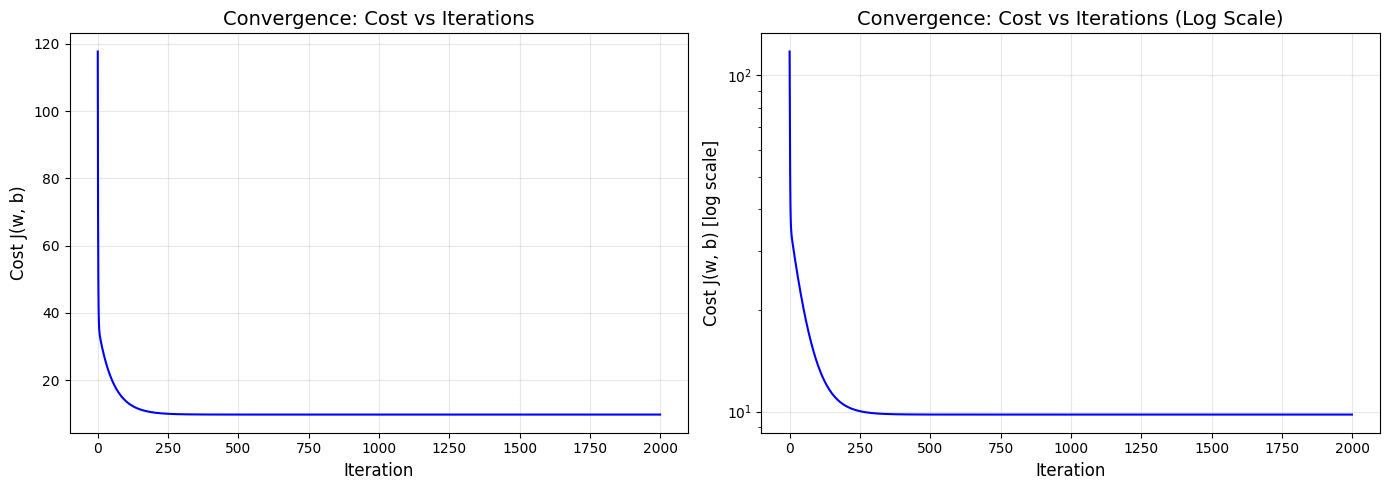

Initial cost: 117.6968
Final cost:   9.7951
Reduction:    91.7%


In [24]:
print("=" * 50)
print("Convergence Analysis")

w_init_convergence = 0.0
b_init_convergence = 0.0
alpha_convergence = 0.1
num_iterations_convergence = 2000

w_conv, b_conv, history_conv = gradient_descent_vectorized( M, L, w_init_convergence, b_init_convergence, alpha_convergence, num_iterations_convergence)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(history_conv, 'b-', linewidth=1.5)
axes[0].set_xlabel("Iteration", fontsize=12)
axes[0].set_ylabel("Cost J(w, b)", fontsize=12)
axes[0].set_title("Convergence: Cost vs Iterations", fontsize=14)
axes[0].grid(True, alpha=0.3)

axes[1].semilogy(history_conv, 'b-', linewidth=1.5)
axes[1].set_xlabel("Iteration", fontsize=12)
axes[1].set_ylabel("Cost J(w, b) [log scale]", fontsize=12)
axes[1].set_title("Convergence: Cost vs Iterations (Log Scale)", fontsize=14)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial cost: {history_conv[0]:.4f}")
print(f"Final cost:   {history_conv[-1]:.4f}")
print(f"Reduction:    {((history_conv[0] - history_conv[-1]) / history_conv[0] * 100):.1f}%")



## 8. Experiments (mandatory)

Run at least three learning rates; report final w, b, and loss.

Learning Rate Experiments

--- Learning Rate α = 0.01 ---
Iteration    0: w =   0.2152, b =   0.1036, Cost =   117.6968
Iteration  100: w =   6.8004, b =   1.5699, Cost =    32.0169
Iteration  200: w =   7.9674, b =  -0.0073, Cost =    28.1260
Iteration  300: w =   8.8900, b =  -1.5257, Cost =    24.9623
Iteration  400: w =   9.7253, b =  -2.9093, Cost =    22.3446
Iteration  500: w =  10.4849, b =  -4.1680, Cost =    20.1787
Iteration  600: w =  11.1759, b =  -5.3129, Cost =    18.3866
Iteration  700: w =  11.8044, b =  -6.3543, Cost =    16.9038
Iteration  800: w =  12.3762, b =  -7.3015, Cost =    15.6769
Iteration  900: w =  12.8962, b =  -8.1632, Cost =    14.6618
Final: w = 13.364761, b = -8.939533, Cost = 13.829458

--- Learning Rate α = 0.1 ---
Iteration    0: w =   2.1523, b =   1.0360, Cost =   117.6968
Iteration  100: w =  13.4290, b =  -9.0460, Cost =    13.7892
Iteration  200: w =  16.3146, b = -13.8270, Cost =    10.3909
Iteration  300: w =  17.4290, b = -15.6735, Cost = 

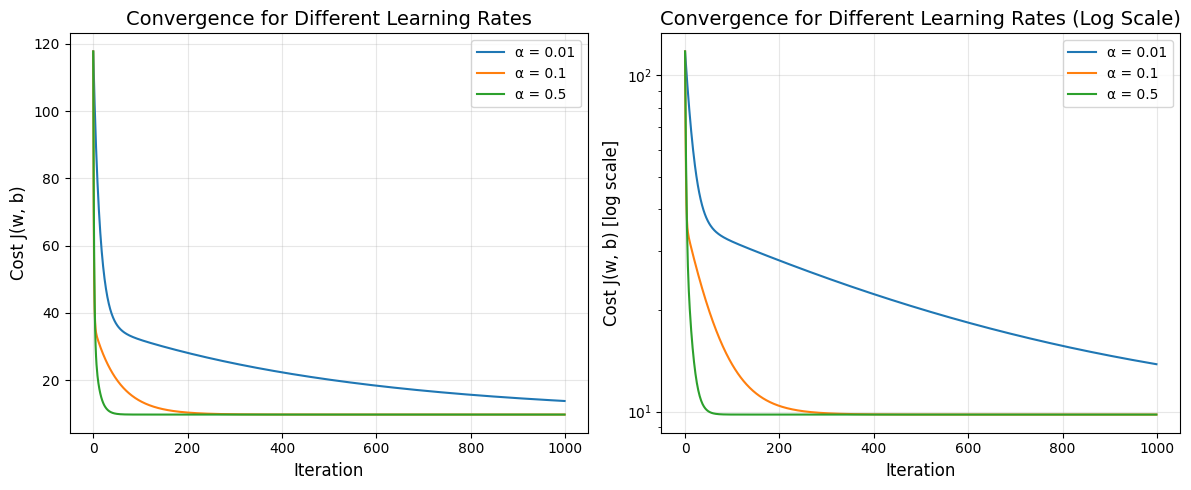

In [30]:
# Task 8: Learning Rate Experiments (Mandatory)

print("=" * 70)
print("Learning Rate Experiments")
print("=" * 70)

# Test three different learning rates
learning_rates = [0.01, 0.1, 0.5]
num_iterations_exp = 1000
results = []

# Store cost histories for plotting
histories = {}

for i in learning_rates:
    print(f"\n--- Learning Rate α = {i} ---")
    w_exp, b_exp, cost_hist_exp = gradient_descent_vectorized(
        M, L, 0.0, 0.0, i, num_iterations_exp
    )
    results.append({
        'learning_rate': i,
        'w': w_exp,
        'b': b_exp,
        'final_cost': cost_hist_exp[-1]
    })
    histories[i] = cost_hist_exp
    print(f"Final: w = {w_exp:.6f}, b = {b_exp:.6f}, Cost = {cost_hist_exp[-1]:.6f}")


# Plot convergence for all learning rates
plt.figure(figsize=(12, 5))

# Plot 1: Linear scale
plt.subplot(1, 2, 1)
for lr in learning_rates:
    plt.plot(histories[lr], label=f'α = {lr}', linewidth=1.5)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Cost J(w, b)", fontsize=12)
plt.title("Convergence for Different Learning Rates", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Log scale for better visualization
plt.subplot(1, 2, 2)
for lr in learning_rates:
    plt.semilogy(histories[lr], label=f'α = {lr}', linewidth=1.5)
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Cost J(w, b) [log scale]", fontsize=12)
plt.title("Convergence for Different Learning Rates (Log Scale)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Final fit plot

Plot the regression line over the data and discuss systematic errors.

Final Model Fit
Final learned parameters:
  w = 18.129395
  b = -16.833951


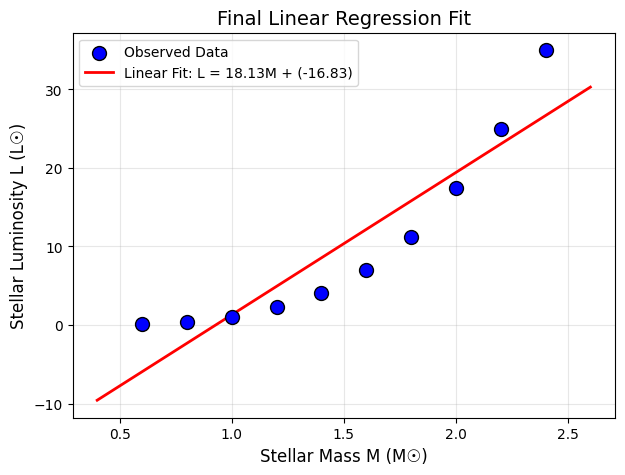


Residual Analysis:
  Mean residual: -0.0001
  Std of residuals: 4.4261
  Max absolute error: 8.3234
  R² score: 0.8470


In [ ]:


w_final = w_learned_v
b_final = b_learned_v
print(f"Final learned parameters:")
print(f"  w = {w_final:.6f}")
print(f"  b = {b_final:.6f}")

L_pred_final = predict(M, w_final, b_final)
residuals = L - L_pred_final

fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(M, L, c='blue', s=100, edgecolors='black',
           label='Observed Data', zorder=5)

M_plot = np.linspace(M.min() - 0.2, M.max() + 0.2, 100)
L_plot = predict(M_plot, w_final, b_final)

ax.plot(M_plot, L_plot, 'r-', linewidth=2,
        label=f'Linear Fit: L = {w_final:.2f}M + ({b_final:.2f})')

ax.set_xlabel("Stellar Mass M (M☉)", fontsize=12)
ax.set_ylabel("Stellar Luminosity L (L☉)", fontsize=12)
ax.set_title("Final Linear Regression Fit", fontsize=14)

ax.legend()
ax.grid(True, alpha=0.3)

plt.show()



# Compute error statistics
print(f"\nResidual Analysis:")
print(f"  Mean residual: {np.mean(residuals):.4f}")
print(f"  Std of residuals: {np.std(residuals):.4f}")
print(f"  Max absolute error: {np.max(np.abs(residuals)):.4f}")
print(f"  R² score: {1 - np.sum(residuals**2) / np.sum((L - np.mean(L))**2):.4f}")

## 10. Conceptual questions

1. Astrophysical meaning of w;
2. Why is a linear model limited here?